In [17]:
import mnist
import numpy as np
import scipy.ndimage

## Load in mnist, and pick one picture

In [18]:
train_mnist = mnist.train_images()
train_mnist_labels = mnist.train_labels()
pick_index = 18 # 23 # 5

picked_picture = train_mnist[pick_index][5:-5,5:-5]

print('picked_picture has label', train_mnist_labels[pick_index])
print('picked_picture has shape', picked_picture.shape)

num_rows_image, num_cols_image = picked_picture.shape[0], picked_picture.shape[1]

picked_picture has label 6
picked_picture has shape (18, 18)


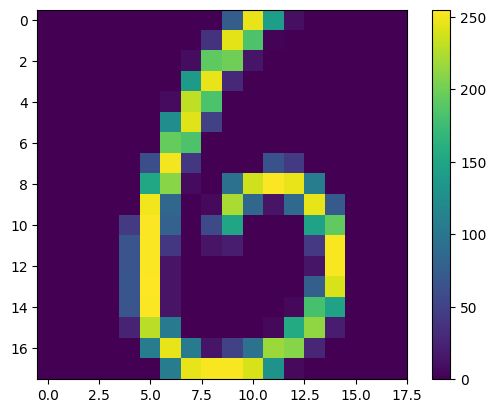

In [19]:
import matplotlib.pyplot as plt

plt.imshow(picked_picture) 
plt.colorbar() 
plt.show()

## Rotate images and store them in an array

In [20]:
def get_rotations(img, rotation_steps):
    for rot in rotation_steps:
        img_ = scipy.ndimage.rotate(img, rot, reshape=False) # newly modified
        yield img_ # newly modified

In [21]:
num_timeframes = 500
start_angle = -180
end_angle = 180
rotation_steps = np.linspace(start_angle, end_angle, num_timeframes)
train_rotations = []

for idx, rotation in enumerate(get_rotations(picked_picture, rotation_steps)):
    train_rotations.append(rotation)

train_rotations = np.array(train_rotations)

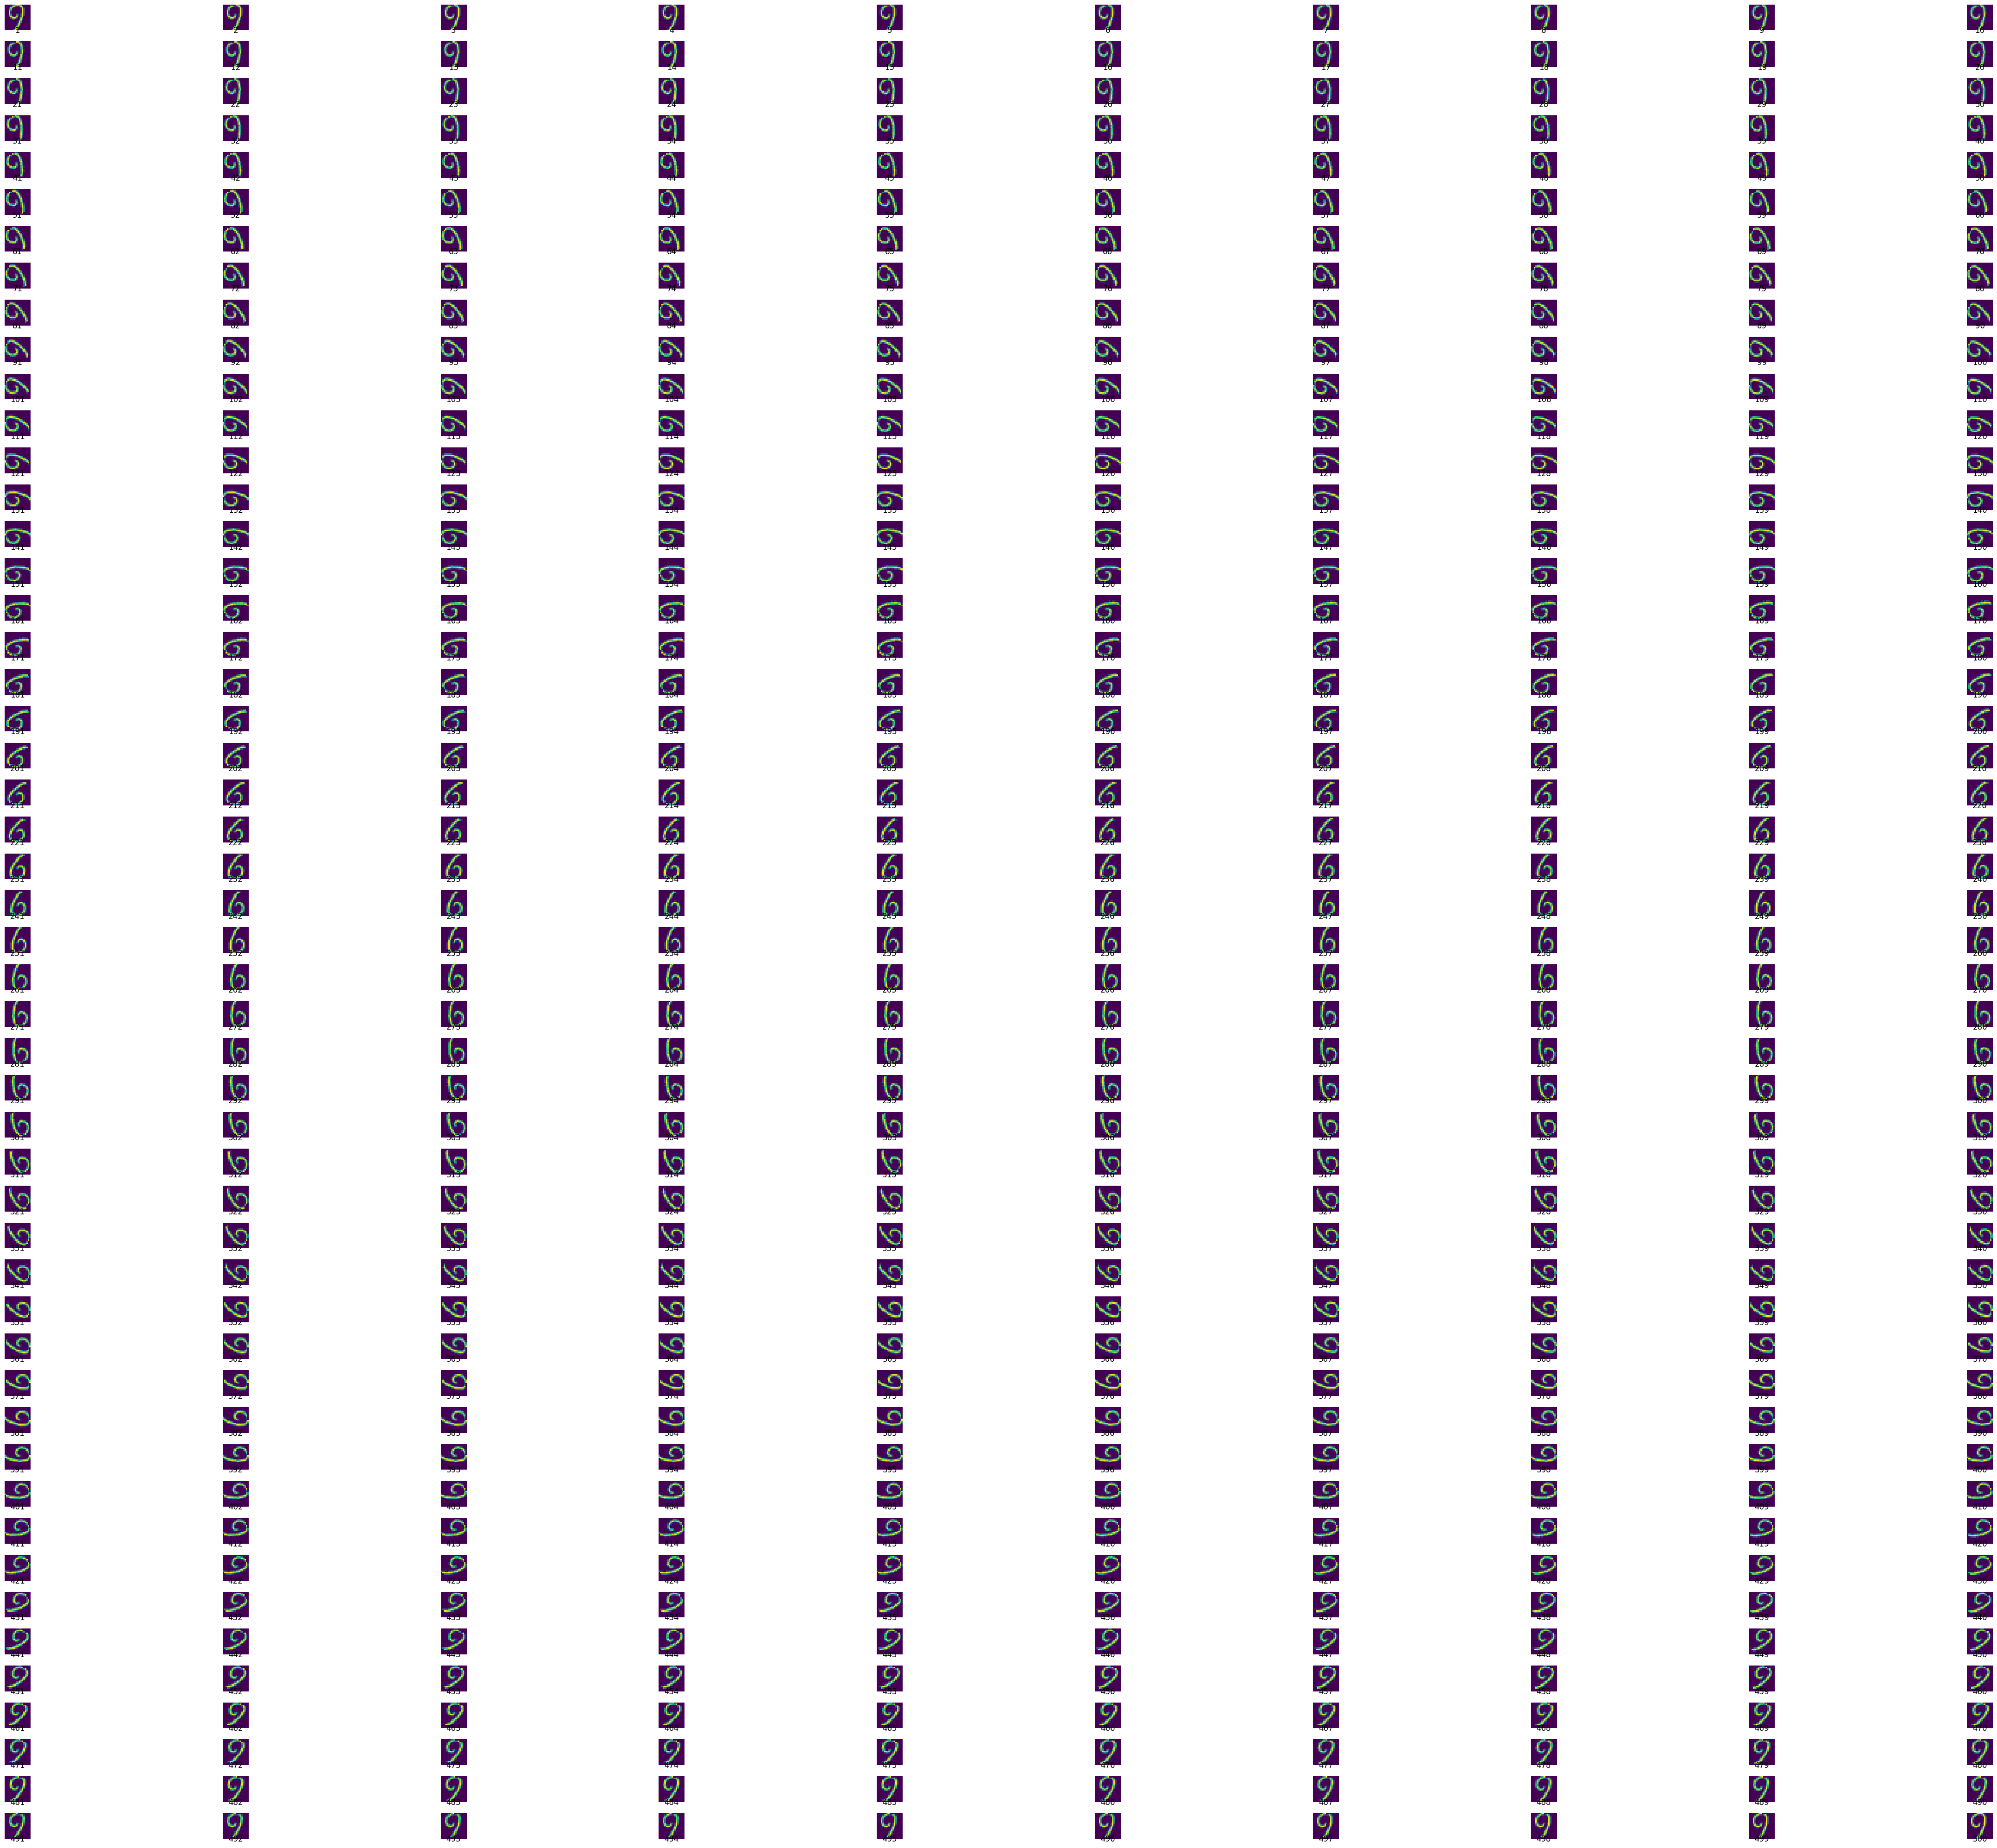

In [22]:
import math
num_images = rotation_steps.shape[0]
images_per_row = 10

num_rows = math.ceil(num_images / images_per_row)
fig = plt.figure(figsize=(50, 40))

for i, image in enumerate(train_rotations):
    row = i // images_per_row
    col = i % images_per_row

    ax = fig.add_subplot(num_rows, images_per_row, i + 1)
    ax.imshow(image)
    ax.axis('off') 
    ax.text(0.5, -0.1, f"{i+1}", size=12, ha="center", transform=ax.transAxes)

plt.tight_layout() 
plt.show()

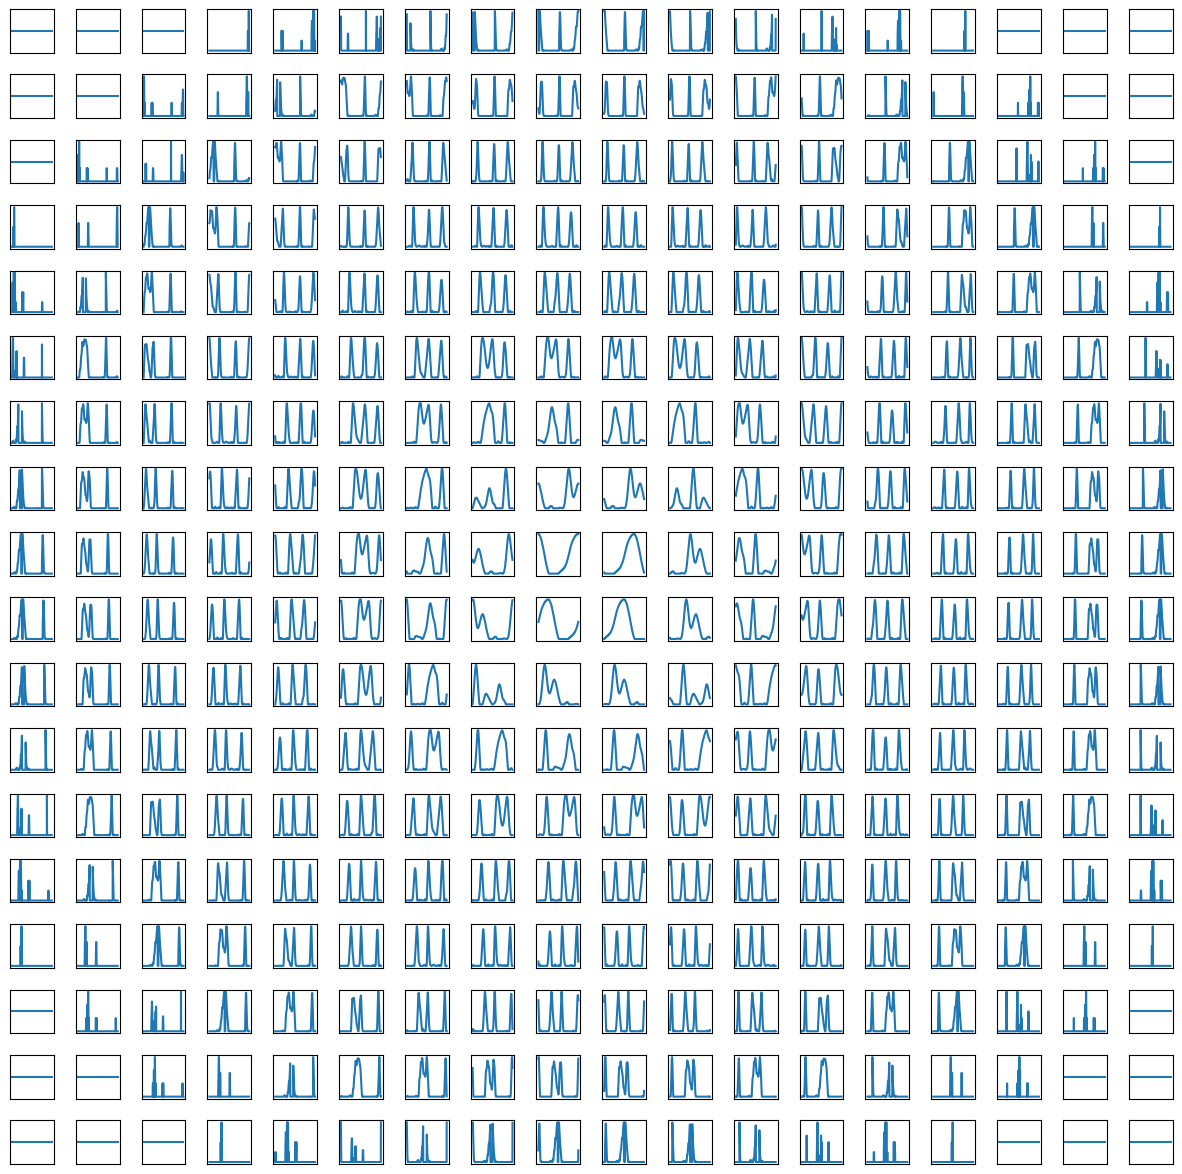

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure with 28x28 subplots
fig, axs = plt.subplots(num_rows_image, num_cols_image, figsize=(15, 15))

# Adjusting the layout
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Looping through each subplot and plotting the corresponding time series
for x in range(num_rows_image):
    for y in range(num_cols_image):
        axs[x, y].plot(train_rotations[:, x, y])
        axs[x, y].set_xticks([])
        axs[x, y].set_yticks([])

# Show the plot
plt.show()


## Save the data as .csv file

In [25]:
train_rotations.shape

(500, 18, 18)